# PageRank
En este cuaderno, ampliarás tus conocimientos sobre los vectores y los valores propios explorando el algoritmo PageRank.
El cuaderno consta de dos partes: la primera es una hoja de ejercicios que te ayudará a familiarizarte con el funcionamiento del algoritmo. En ella analizaremos una microinternet con menos de 10 sitios web y veremos qué hace y qué puede fallar.
La segunda es una evaluación que pondrá a prueba tu aplicación de la teoría de eigentheory a este problema escribiendo código y calculando el page rank de una gran red que representa una subsección de Internet.

## Parte 1 - Hoja de trabajo
### Introducción

PageRank (desarrollado por Larry Page y Sergey Brin) revolucionó la búsqueda en la web al generar una
una lista ordenada de páginas web basada en la conectividad subyacente de la web. El algoritmo PageRank
El algoritmo PageRank se basa en un internauta aleatorio ideal (*random surfer*)que, al llegar a una página, pasa a la siguiente haciendo clic en un enlace.
enlace. El internauta tiene la misma probabilidad de hacer clic en cualquier enlace de la página y, cuando llega a una página sin enlaces, tiene la misma probabilidad de pasar a cualquier otra página tecleando su URL.
Además, el internauta puede optar ocasionalmente por teclear una URL aleatoria en lugar de seguir los enlaces de una página. El PageRank es
es el orden de clasificación de las páginas, desde la más probable hasta la menos probable.


In [1]:
# Antes de empezar, carguemos los paquetes necesarios
%matplotlib inline
import numpy as np
import numpy.linalg as la
from math import isclose
np.set_printoptions(suppress=True)

### PageRank visto como un problema de álgebra lineal
Imaginemos una micro-internet con solo 6 webs (**A**vocado, **B**ullseye, **C**atBabel, **D**romeda, **e**Tings, and **F**aceSpace).
Cada web enlaza a alguna de las otras, y esto forma una red como se puede ver a continuación.


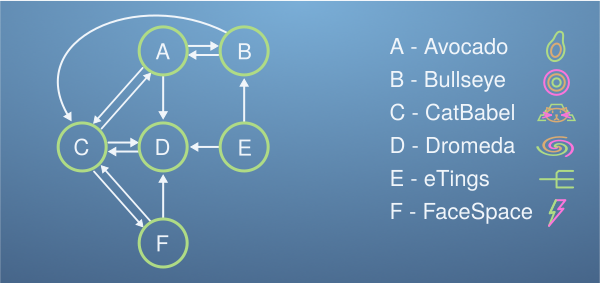

El principio de diseño de PageRank es que los sitios web importantes serán enlazados por sitios web importantes.
Este principio, en cierto modo recursivo, será la base de nuestro desarrollo.

Imaginemos que en nuestra microinternet hay 100 *random surfers*, cada uno de los cuales ve un solo sitio web a la vez.
Cada minuto, los *random surfers* siguen un enlace de su sitio web a otro sitio de la microinternet.
Al cabo de un tiempo, los sitios web con más enlaces recibirán más visitas de *random surfers* y, a largo plazo, cada minuto por cada *random surfers* que abandona un sitio web, entra otro, manteniendo constante el número total de *random surfers* en cada sitio web.
El PageRank es simplemente la clasificación de los sitios web según el número de *random surfers* que tienen al final de este proceso.

Representamos el número de *random surfers* en cada sitio web con el vector,
$$\mathbf{r} = \begin{bmatrix} r_A \\ r_B \\ r_C \\ r_D \\ r_E \\ r_F \end{bmatrix}$$
Y decir que el número de *random surfers* en cada web en el minuto $i+1$ está relacionado con los del minuto $i$ por la transformación matricial

$$ \mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$
teniendo la matriz $L$ la siguiente forma,
$$ L = \begin{bmatrix}
L_{A→A} & L_{B→A} & L_{C→A} & L_{D→A} & L_{E→A} & L_{F→A} \\
L_{A→B} & L_{B→B} & L_{C→B} & L_{D→B} & L_{E→B} & L_{F→B} \\
L_{A→C} & L_{B→C} & L_{C→C} & L_{D→C} & L_{E→C} & L_{F→C} \\
L_{A→D} & L_{B→D} & L_{C→D} & L_{D→D} & L_{E→D} & L_{F→D} \\
L_{A→E} & L_{B→E} & L_{C→E} & L_{D→E} & L_{E→E} & L_{F→E} \\
L_{A→F} & L_{B→F} & L_{C→F} & L_{D→F} & L_{E→F} & L_{F→F} \\
\end{bmatrix}
$$

que no es más que la traspuesta de la matriz de adyacencia. Las columnas representan la probabilidad de abandonar un sitio web por cualquier otro, y suman uno.
Las filas determinan una especie de probabilidad de entrar en un sitio web desde cualquier otro, aunque no es necesario que sumen uno.
El comportamiento a largo plazo de este sistema es cuando $ \mathbf{r}^{(i+1)} = \mathbf{r}^{(i)}$, por lo que vamos a eliminar los superíndices aquí, y que nos permite escribir,
$$ L \,\mathbf{r} = \mathbf{r}$$

que es una ecuación de valores propios para la matriz $L$, con valor propio 1 (esto está garantizado por la estructura probabilística de la matriz $L$).

Completa la matriz $L$ a continuación. Hemos omitido la columna de los sitios web a los que enlaza el sitio web *FaceSpace* (F).
Recuerda, esta es la probabilidad de hacer clic en otro sitio web a partir de éste, por lo que cada columna debe sumar uno (normalizando por el número de enlaces).

In [2]:
# Escribe la matriz de adyacencia del grafo anterior

# BEGIN YOUR CODE
A = np.array([
    [0, 1, 1, 0, 0, 0],  # A
    [1, 0, 0, 0, 1, 0],  # B
    [1, 0, 1, 1, 0, 1],  # C
    [0, 0, 1, 0, 1, 0],  # D
    [0, 0, 0, 0, 0, 0],  # E
    [0, 0, 1, 1, 0, 0]   # F
])
# END YOUR CODE

# Calcula la matriz de transicion

def L_from_A(A):
    # BEGIN YOUR CODE
    # Normalizar cada columna por el número de enlaces salientes (suma de la columna)
    col_sums = A.sum(axis=0)  # Suma por columnas
    # Evitar división por cero (aunque en este caso no hay columnas nulas)
    col_sums[col_sums == 0] = 1  # Para evitar error, aunque no debería ocurrir
    L = A / col_sums
    # END YOUR CODE
    return L


L = L_from_A(A)

print(A)
print(L)


[[0 1 1 0 0 0]
 [1 0 0 0 1 0]
 [1 0 1 1 0 1]
 [0 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]]
[[0.   1.   0.25 0.   0.   0.  ]
 [0.5  0.   0.   0.   0.5  0.  ]
 [0.5  0.   0.25 0.5  0.   1.  ]
 [0.   0.   0.25 0.   0.5  0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.5  0.   0.  ]]


En principio, podríamos utilizar una biblioteca de álgebra lineal, como la que se muestra a continuación, para calcular los valores propios y los vectores.
Y esto funcionaría para un sistema pequeño. Pero esto se vuelve inmanejable para grandes sistemas.
Y puesto que sólo nos preocupamos por el vector propio principal (el que tiene el mayor valor propio, que será 1 en este caso), podemos utilizar el *método de la potencia* que escala mejor, y es más rápido para sistemas grandes.

Utiliza el código de abajo para echar un vistazo al PageRank de este micro-internet.

In [3]:
eVals, eVecs = la.eig(L) # Calculamos los vectores y valores propios de la matriz
order = np.absolute(eVals).argsort()[::-1] # Los ordenamos los valores propios
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # asignamos a r el vector propio principal
100 * np.real(r / np.sum(r)) # Normalizamos r y multiplicamos por 100 para obtener un porcentaje de random surfers

array([21.05263158, 10.52631579, 42.10526316, 10.52631579,  0.        ,
       15.78947368])

Podemos ver en esta lista, el número de *random surfers* que esperamos encontrar en cada sitio web después de mucho tiempo.
Poniéndolos en orden de *popularidad* (basado en esta métrica), el PageRank de esta micro-internet es:

**C**atBabel, **D**romeda, **A**vocado, **F**aceSpace, **B**ullseye, **e**Tings

Volviendo al diagrama de la microinternet, ¿es esto lo que esperabas?
Convéncete de que, basándose en las páginas que le parecen importantes y en los enlaces que enlazan con ellas, se trata de una clasificación razonable.

Intentemos ahora obtener el mismo resultado utilizando el método iterativo de la potencia que se vio en clase.
Este método es mucho mejor cuando se trata de sistemas grandes.

En primer lugar vamos a establecer nuestro vector inicial, $\mathbf{r}^{(0)}$, de modo que tenemos nuestros 100 *random surfers* distribuidos por igual en cada uno de nuestros 6 sitios web. 

**NOTA: Es importante que te des cuenta de que siempre trabajamos con números entre 0 y 1 y multiplicamos por 100 solo a la hora de mostrar los valores al usuario.**

In [4]:
r = np.ones(6) / 6
r * 100

array([16.66666667, 16.66666667, 16.66666667, 16.66666667, 16.66666667,
       16.66666667])

A continuación, actualicemos el vector al minuto siguiente, con la matriz $L$.
Ejecute la siguiente celda varias veces, hasta que la respuesta se estabilice.

In [5]:
r = L @ r # Multiplicamos la matriz L por r
r * 100 # Muestra el valor
# Si ejecutas esta celda múltiples veces verás que va convergiendo a la respuesta correcta

array([20.83333333, 16.66666667, 37.5       , 12.5       ,  0.        ,
       12.5       ])

Podemos automatizar la aplicación de esta matriz varias veces de la siguiente manera,

In [6]:
r = np.ones(6) / 6
for i in np.arange(100) : # Repite 100 veces
    r = L @ r
r * 100

array([21.05263158, 10.52631579, 42.10526316, 10.52631579,  0.        ,
       15.78947368])

O mejor aún, podemos seguir ejecutando hasta llegar a la tolerancia requerida. En este caso, pedimos que la norma de la diferencia entre dos iteraciones sea menor de una diez milésima.

In [7]:
r = np.ones(6) / 6
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.0001 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iteraciones.")
r * 100

31 iteraciones.


array([21.05558447, 10.52445515, 42.10334289, 10.52692067,  0.        ,
       15.78969681])

Observa cómo el orden PageRank se establece con bastante rapidez, y el vector converge en el valor que calculamos anteriormente después de unas pocas decenas de repeticiones (cambia la tolerancia para que sea suficientemente pequeña).

¡Enhorabuena! Acabas de calcular su primer PageRank.

### Parámetro de amortiguación
El sistema que acabamos de estudiar converge con bastante rapidez hacia la respuesta correcta.
Consideremos una ampliación de nuestra microinternet en la que las cosas empiezan a ir mal.

Digamos que un nuevo sitio web se añade a la micro-internet: El sitio web de Geoff.
Este sitio web está enlazado por *FaceSpace* y sólo se enlaza a sí mismo.

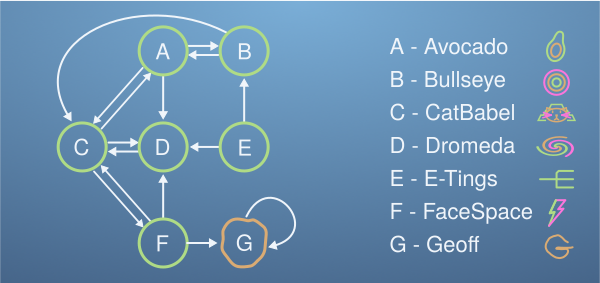

Intuitivamente, sólo *FaceSpace*, que se encuentra en la mitad inferior del PageRank, enlaza a este sitio web entre los otros dos a los que enlaza,
así que podríamos esperar que el sitio de *Geoff* tuviera una puntuación PageRank correspondientemente baja.

Construye la nueva matriz de adyacencia $A2$ para la micro-internet ampliada, a partir de ella, construye la $L2$ y utiliza el método de la potencia iterativa para obtener la nueva solución.

In [8]:
# La llamaremos A2 para distinguirla de la anterior matriz A.
# a la matriz de transición la llamaremos L2

# BEGIN YOUR CODE

A2 = np.array([
    [0, 1, 1, 0, 0, 0, 0], # A
    [1, 0, 0, 0, 1, 0, 0], # B
    [1, 0, 1, 1, 0, 1, 0], # C
    [0, 0, 1, 0, 1, 0, 0], # D
    [0, 0, 0, 0, 0, 0, 0], # E
    [0, 0, 1, 1, 0, 0, 0], # F
    [0, 0, 0, 0, 0, 1, 1], # G
])

# Calcula la matriz de transicion

L2 = L_from_A(A2)
# END YOUR CODE


In [9]:
r = np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L2 @ r  # usamos la nueva matriz calculada
i = 0
while la.norm(lastR - r) > 0.000001 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r  # Ya no multiplicamos por 100 porque ya se ha entendido la metáfora de los navegantes

140 iterations to convergence.


array([0.00000248, 0.00000135, 0.00000378, 0.00000102, 0.        ,
       0.00000158, 0.99998979])

¡Eso no es bueno! Parece que *Geoff* se está llevando todo el tráfico de la micro-internet, y de alguna manera llega a la cima del PageRank.
Este comportamiento puede entenderse, porque una vez que un *random surfer* llega al sitio web de *Geoff*, no puede salir, ya que todos los enlaces vuelven a Geoff.

Para combatir esto, podemos añadir una pequeña probabilidad de que los *random surfers* no sigan ningún enlace en una página web, sino que visiten un sitio web en la micro-internet al azar.
Diremos que la probabilidad de que sigan un enlace es $d$ y la probabilidad de que elijan un sitio web al azar es, por tanto, $1-d$.
Podemos utilizar una nueva matriz para calcular qué sitios visitan los *random surfers* cada minuto.
$$ M = d \, L + \frac{1-d}{n} \, J $$
donde $J$ es una matriz $n \times n$ donde cada elemento es uno.

Si $d$ es uno, tenemos el caso que teníamos anteriormente, mientras que si $d$ es cero, siempre visitaremos una página web aleatoria y, por tanto, todas las páginas web tendrán la misma probabilidad y la misma clasificación.
Para que esta extensión funcione mejor, $1-d$ debe ser algo pequeño, aunque no entraremos a discutir cómo de pequeño exactamente.

Volvamos a probar este PageRank con esta extensión.

In [10]:
d = 0.5 # Puedes jugar con este parámetro para ver diferentes comportamientos.
# BEGIN YOUR CODE
# Define la matriz M usando al expresión anterior usando L2
M = d * L2 + (1-d)/7 * np.ones([7, 7]) # np.ones() es la matriz J, con todas las entradas a 1.
# END YOUR CODE

In [11]:
r = np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.0001 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iteraciones.")
r

8 iteraciones.


array([0.16059443, 0.12944266, 0.195546  , 0.11373087, 0.07142857,
       0.12430893, 0.20494854])

Esto es ciertamente mejor. El PageRank da números sensatos para los *random users* que terminan en cada página web.
Sin embargo, este método sigue prediciendo que Geoff tiene una página web de alto rango.
Esto podría considerarse una consecuencia del uso de una red pequeña. También podríamos evitar el problema no contando los autoenlaces al producir la matriz L, y si un sitio web no tiene enlaces salientes, hacer que enlace a todos los sitios web por igual.

**Implementa esta mejora**: elimina los autoenlaces y, para cada sumidero que haya, configúralo para que salte aleatoriamente por igual a todos los nodos incluido él mismo. Haz estos cambios sobre la matriz de adyacencia para que el cálculo de la matriz L se haga adecuadamente.

In [12]:
# Propuesta: implementa las dos mejoras que se indican en el texto
# modificando las matrices adecuadamente
# Para ello tendrás que eliminar todos los autoenlaces de la matriz y sustituir las filas 
# de los nodos que estén todas a cero haciendo que sean un salto aleatorio a cualquier 
# otro nodo, incluido él mismo.

def remove_autolinks(A):
    Aux = A.copy()
    # BEGIN YOUR CODE
    n = Aux.shape[0]
    for i in range(n):
        Aux[i, i] = 0
    # END YOUR CODE
    return Aux

def fill_sinks(A):
    Aux = A.copy()
    # BEGIN YOUR CODE
    col_sums = A.sum(axis=0) # Suma por columnas
    # Encuentra columnas que suman 0 (pozos)
    sink_cols = (col_sums == 0)
    # Llena esas columnas con 1
    for j in range(Aux.shape[1]):
        if sink_cols[j]:
            Aux[:, j] = 1
    # END YOUR CODE
    return Aux

def fix_A(A):
    Aux = remove_autolinks(A)
    Aux = fill_sinks(Aux)
    return Aux

A3 = fix_A(A2)
L3 = L_from_A(A3)
L3

array([[0.        , 1.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.14285714],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.14285714],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ,
        0.5       , 0.14285714],
       [0.        , 0.        , 0.33333333, 0.        , 0.5       ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.33333333, 0.5       , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.14285714]])

In [13]:
# Vamos a definir una función que aplique el método de la potencia a una matriz
# y así no tenemos que estar copiando el código

def pagerank_dense(Ld, d=0.5, eps=0.00001):
    """ Aplica el método de la potencia como hemos implementado anteriormente
        hasta que la diferencia entre la norma de dos vectores consecutivos sea menor que eps,
        o que dicha diferencia no disminuya, sino que aumente, en cuyo caso se considerará que
        el método no converge.
        
        Args:
            Ld: Matriz de transición densa (numpy array)
            d: factor de amortiguamiento (float)
            eps: tolerancia para la convergencia (float)

        Devuelve el vector resultante y el número de iteraciones. 
        Si no converge, el número de iteraciones devuelto será 0
    """
    length = Ld.shape[0]
    r = np.ones(length)/length
    i = 0
    # BEGIN YOUR CODE
    prev_diff = float('inf') # Diferencia previa, inicialmente infinita

    while True:
        # Calcular la nueva matriz M para esta iteración
        n = length
        J = np.ones([n, n])
        M = d * Ld + (1 - d) / n * J

        # Calcular r^(i+1) = M * r^(i)
        r_new = M @ r

        # Calcular la norma de la diferencia
        diff = np.linalg.norm(r_new - r)

        # Comprobar si la diferencia es menor que eps
        if diff < eps:
            r = r_new
            i += 1
            break

        # Comprobar si la diferencia ha aumentado (no converge)
        if diff > prev_diff:
            # No converge
            return r, 0 # Devuelve vector actual y 0 iteraciones

        # Actualizar r, diferencia previa e iterador
        r = r_new
        prev_diff = diff
        i += 1
    # END YOUR CODE
    return r, i 

In [14]:
# La aplicamos a la matriz anterior para ver el resultadoA
r, iteraciones = pagerank_dense(L3)
print(f"{iteraciones} iteraciones para converger.")
print(r)

11 iteraciones para converger.
[0.18527095 0.14596644 0.19542795 0.13221844 0.07971814 0.14534384
 0.11605425]


Ahora estás en una buena posición, después de haber adquirido una comprensión de PageRank, para producir tu propio código para calcular el PageRank de un sitio web con miles de entradas.

El problema con este tamaño de red es que empieza a no ser eficiente el uso de la multiplicación matricial, así que vamos a probar un nuevo método que esperamos que nos dé más velocidad. Vamos a trabajar con una versión dispersa de la matriz L. Para ello vamos a utilizar para representar la matriz una lista de listas de tuplas, de manera que ahora una matriz será una lista de filas, donde cada fila es una lista de tuplas de la forma (col, value), donde col es el número de la columna que tiene un valor distinto de 0.0 y value, dicho valor.

Como ejemplo, la matriz L3 se representaría como sigue, mostrando primero la versión densa y a continuación la versión dispersa:

```
array([[0.        , 0.5       , 0.33333333, 0.        , 0.        , 0.        , 0.14285714],
       [0.33333333, 0.        , 0.        , 0.        , 0.5       , 0.        , 0.14285714],
       [0.33333333, 0.5       , 0.        , 1.        , 0.        , 0.33333333, 0.14285714],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.5       , 0.33333333, 0.14285714],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.14285714],
       [0.        , 0.        , 0.33333333, 0.        , 0.        , 0.        , 0.14285714],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.33333333, 0.14285714]])

[[(1, 0.5), (2, 0.3333333333333333), (6, 0.14285714285714285)],
 [(0, 0.3333333333333333), (4, 0.5), (6, 0.14285714285714285)],
 [(0, 0.3333333333333333), (1, 0.5), (3, 1.0), (5, 0.3333333333333333), (6, 0.14285714285714285)],
 [(0, 0.3333333333333333), (2, 0.3333333333333333), (4, 0.5), (5, 0.3333333333333333), (6, 0.14285714285714285)],
 [(6, 0.14285714285714285)],
 [(2, 0.3333333333333333), (6, 0.14285714285714285)],
 [(5, 0.3333333333333333), (6, 0.14285714285714285)]]
````

Para que no haya problemas con la precisión, lo ideal sería partir de la matriz de adyacencia y calcular a partir de dicha matriz la matriz de transición dispersa. Os ponemos a continuación las funciones que necesitaréis implementar.



In [15]:
def make_L_sparse_from_A(A):
    """ Dada una matriz de adyacencia densa de entrada, devuelve la matriz L en versión dispersa
    """
    L_sparse = []
    # BEGIN YOUR CODE
    n = A.shape[0]

    for i in range(n):
        row = []
        # Calcula la suma de la fila (número de enlaces salientes)
        row_sum = np.sum(A[i, :])

        # Si la fila tiene enlaces salientes, normalizamos
        if row_sum > 0:
            for j in range(n):
                if A[i, j] != 0:
                    # Añadir tupla (columna, valor normalizado)
                    row.append((j, A[i, j] / row_sum))
        # Si es un sumidero (row_sum == 0), distribuimos uniformemente
        else:
            for j in range(n):
                row.append((j, 1.0 / n))

        L_sparse.append(row)
    # END YOUR CODE
    return L_sparse

In [16]:
make_L_sparse_from_A(A3)  # compara que da el resultado correcto

[[(1, np.float64(0.3333333333333333)),
  (2, np.float64(0.3333333333333333)),
  (6, np.float64(0.3333333333333333))],
 [(0, np.float64(0.3333333333333333)),
  (4, np.float64(0.3333333333333333)),
  (6, np.float64(0.3333333333333333))],
 [(0, np.float64(0.25)),
  (3, np.float64(0.25)),
  (5, np.float64(0.25)),
  (6, np.float64(0.25))],
 [(2, np.float64(0.3333333333333333)),
  (4, np.float64(0.3333333333333333)),
  (6, np.float64(0.3333333333333333))],
 [(6, np.float64(1.0))],
 [(2, np.float64(0.3333333333333333)),
  (3, np.float64(0.3333333333333333)),
  (6, np.float64(0.3333333333333333))],
 [(5, np.float64(0.5)), (6, np.float64(0.5))]]

In [17]:
def multiply_sparse(Ls, p):
    """ Multiplica una matriz dispersa Ls por un vector p

        Args:
            Ls: Matriz de transición dispersa (lista de listas)
            p: vector (numpy array)

        Devuelve el vector resultado (numpy array)
    """
    q = np.zeros_like(p)
    # BEGIN YOUR CODE
    
    # END YOUR CODE
    return q

In [18]:
def pagerank_sparse(Ls, d=0.5, eps=0.00001):
    """ Recibe una matriz de transición dispersa (sin incluir la matriz de todo unos)
        Devuelve el vector resultado y el número de iteraciones
        Si no converge para, devolviendo como número de iteraciones un 0
    """
    
    length = len(Ls)
    r = np.ones(length) / length
    i = 0
    # BEGIN YOUR CODE
    
    # END YOUR CODE 
    return r, i
    

In [19]:
Ms = make_L_sparse_from_A(A3)
print(Ms)
r, iteraciones = pagerank_sparse(Ms, eps=0.000001)
print(f"{iteraciones} iteraciones para converger.")
print(r)

[[(1, np.float64(0.3333333333333333)), (2, np.float64(0.3333333333333333)), (6, np.float64(0.3333333333333333))], [(0, np.float64(0.3333333333333333)), (4, np.float64(0.3333333333333333)), (6, np.float64(0.3333333333333333))], [(0, np.float64(0.25)), (3, np.float64(0.25)), (5, np.float64(0.25)), (6, np.float64(0.25))], [(2, np.float64(0.3333333333333333)), (4, np.float64(0.3333333333333333)), (6, np.float64(0.3333333333333333))], [(6, np.float64(1.0))], [(2, np.float64(0.3333333333333333)), (3, np.float64(0.3333333333333333)), (6, np.float64(0.3333333333333333))], [(5, np.float64(0.5)), (6, np.float64(0.5))]]
0 iteraciones para converger.
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


In [20]:
def pagerank_sparse_improved(Ls, a, d=0.5, eps=0.00001):
    """ Calcula el pagerank de una matriz de transición sin que sea necesario modificarla, por lo que
        no deja de ser dispersa.
        Args:
            Ls: Matriz de transición dispersa (lista de listas)
            a: vector que indica los nodos sumideros (numpy array)
            d: factor de amortiguamiento (float)
            eps: tolerancia para la convergencia (float)

        Devuelve el vector resultado y el número de iteraciones
        Si no converge para, devolviendo como número de iteraciones un 0
    """

    length = len(Ls)
    r = np.ones(length) / length
    e = np.ones(length)
    i = 0
    # BEGIN YOUR CODE
    max_iter = 100000
    lastR = r.copy()

    while i < max_iter:
        # Multiplicación dispersa: Ls @ r
        r_sparse = multiply_sparse(Ls, r)

        # Componentes de sumideros: a * (a^T @ r)
        sink_contrib = a * np.dot(a.T, r)

        # Fórmula del PageRank mejorado
        r = d * (r_sparse + sink_contrib) + (1 - d) / length * e

        # Comprobar convergencia
        if la.norm(r - lastR) < eps:
            break

        lastR = r.copy()
        i += 1

    if i >= max_iter:
        i = 0  # No converge
    
    # END YOUR CODE 
    return r, i

In [21]:
# Volvemos a hacer los cálculos con la nueva función
A4 = remove_autolinks(A2)
Ms = make_L_sparse_from_A(A4)
a = (A4.sum(1) == 0)*1 # calculamos los nodos sumideros
pagerank_sparse_improved(Ms, a, eps=0.000001)

(array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.14285714,
        0.07142857, 0.07142857]),
 1)

## Parte 2 - Evaluación
En esta evaluación, se te pedirá que implementes una función que pueda calcular el PageRank para una matriz de probabilidad arbitrariamente grande.
Para esta labor, no se te proporcionarán indicaciones, y la implementación debe buscar la rapidez. Deberás utilizar código anterior y adaptarlo a tus necesidades.

In [22]:
# Se han puesto los includes por si los necesitaras para evaluar esta parte por separado
# No hace falta que modifiques esta celda
import numpy as np
import numpy.linalg as la

np.set_printoptions(suppress=True)

def generate_internet_A(n) :
    A = np.full([n,n], np.arange(n))
    A = (abs(np.random.standard_cauchy([n,n])/2) > (np.abs(A - A.T) + 1)) + 0
    return A

Vamos a comparar el tiempo de ejecución de los diferentes métodos que hemos visto. En primer lugar vamos a ver el tiempo que se tarda en obtener los valores y vectores propios usando la biblioteca de álgebra lineal. Este tiempo lo compararemos con el método de la potencia densa y finalmente con el de la potencia dispersa.

In [23]:
# Generamos una red suficientemente grande para notar las diferencias
Afixed = fix_A(generate_internet_A(5000))
Li = L_from_A(Afixed)

In [24]:
%%time
# Estamos calculando los valores propios de la matriz L incluyendo el factor de amortiguamiento

Leig = 0.85 * Li + (1-0.85)/Li.shape[0]
eVals, eVecs = la.eig(Leig) # obtiene los valores y vectores propios
order = np.absolute(eVals).argsort()[::-1] # los ordenamos por sus valores propios
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
r = np.real(r / np.sum(r))

CPU times: user 2min 44s, sys: 4.54 s, total: 2min 48s
Wall time: 24.8 s


In [25]:
print(r)

[0.00010775 0.00005323 0.00006646 ... 0.0001626  0.00008    0.00008781]


In [26]:
%%time
r, i = pagerank_dense(Li, d=0.85, eps=0.0000001)


CPU times: user 2.16 s, sys: 833 ms, total: 3 s
Wall time: 1.91 s


In [27]:
print(r)

[0.00010775 0.00005323 0.00006646 ... 0.0001626  0.00008    0.00008781]


In [28]:
Lis = make_L_sparse_from_A(Afixed)

In [29]:
%%time
rspar, ispar = pagerank_sparse(Lis, d=0.85, eps=0.000001)

CPU times: user 33 μs, sys: 1 μs, total: 34 μs
Wall time: 36 μs


In [30]:
print(rspar)

[0.0002 0.0002 0.0002 ... 0.0002 0.0002 0.0002]


In [31]:
%%time
a = (Afixed.sum(1) == 0)*1 # calculamos los nodos sumideros

CPU times: user 10.2 ms, sys: 40 μs, total: 10.3 ms
Wall time: 9.61 ms


In [32]:
%%time
rspar_imp, ispar_imp = pagerank_sparse_improved(Lis, a, d=0.85, eps=0.000001)

CPU times: user 722 μs, sys: 23 μs, total: 745 μs
Wall time: 492 μs


In [33]:
print(rspar_imp)

[0.00003 0.00003 0.00003 ... 0.00003 0.00003 0.00003]


¿Cuál ha tardado más? ¿Qué explicación das a la diferencia o no de tiempo de ejecución? Si hay una mejora significativa, explica por qué crees que es, y si no hay una mejora significativa, da un posible motivo.

### Análisis de Tiempos de Ejecución

**Orden de velocidad (de más lento a más rápido):**

1. **`la.eig()` - El más lento**

    - Calcula **todos** los valores y vectores propios de la matriz.
    - Complejidad: $O(n^3)$.
    - Para una matriz de 5000x5000, esto es extremadamente costoso.

2. **`pagerank_dense()` - Lento**

    - Usa multiplicación matricial densa: `M @ r`.
    - Cada iteración requiere $O(n^2)$ operaciones.
    - Aunque es iterativo, opera sobre matrices densas complejas.

3. **`pagerank_sparse()` - Rápido**

    - Usa multiplicación dispersa que solo opera sobre elementos no nulos.
    - Complejidad por iteración: $O(k)$, donde $k$ es el número de elementos no nulos.
    - En grafos web típicos, $k\ll n^2$.

4. **`pagerank_sparse_improved()` - El más rápido**

    - Aprovecha la estructura dispersa.
    - **Evita modificar la matriz** para incluir sumideros (mantiene dispersidad).
    - Maneja los nodos sumideros mediante el vector `a` sin llenar la matriz.
    - Reduce significativamente el número de operaciones.

### Explicación de las Diferencias
**¿Por qué `pagerank_sparse_improved` es superior?**

- **Mantiene la dispersidad:** La versión `pagerank_sparse()` podría requerir modificar la matriz para manejar sumideros, lo que aumentaría los elementos no nulos. La versión mejorada calcula la contribución de los sumideros mediante `a * np.dot(a, r)`, evitando modificar `Ls`.
- **Operaciones eficientes:** Solo opera sobre los enlaces reales del grafo, ignorando los ceros.
- **Escalabilidad:** Para una red de 5000 nodos con conectividad típica (cada uno enlaza $\sim 10-20$ otros), la diferencia entre $O(5000^2)$ y $O(5000\times 15)$ es significativa.